<div dir="rtl" class="alert alert-block alert-info"> <font size="5" face="HM XNiloofar"> 
<b> یادگیری تقویتی : تمرین شبیه‌سازی اول </b>
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br />
فقط قسمت‌های <code>TODO</code> را پر کنید و  Jupyter Notebook تکمیل شده را به فرمت <code>ipynb</code> و <code>html</code> به عنوان گزارش خود در CW آپلود کنید. <br />
در این تمرین شما در یک محیط بازی تعریف شده الگوریتم‌های Policy Iteration   و Value Iteration را به عنوان دو الگوریتم model-based و Q-Learning را برای model-free  پیاده‌سازی می‌کنید و با تاثیر پارامتر‌های مختلف در الگوریتم‌ها آشنا می‌شوید. <br />
</font> </div>

***You can jump directly to these sections:***

+ [A. An experience with the environment](#A.-An-experience-with-the-environment)
+ [B. Policy Iteration (model-based)](#B.-Policy-Iteration)
+ [C. Value Iteration (model-based)](#C.-Value-Iteration)
+ [D. Q-Learning (model-free)](#D.-Q-Learning)
+ [Give Us Feedback](#Give-Us-Feedback)

---

<div dir="rtl"> <font size="4" face="HM XNiloofar"> <b>  آخرین گنج قارون: </b>
 یک تیم کاوشگری در یکی از مناطق باستانی، نقشه‌ی گنجی که در زیرزمینی متروکه مخفی شده است را پیدا می‌کند. در نقشه محل گنج 💰، کلید آن 🔑 و گودال‌های مرگ 🕳️ نشان داده شده  است. از آنجا که دسترسی به این گنج فقط به کمک یک ربات کاوشگر 🤖 ممکن است، این تیم از شما به عنوان یک متخصص علوم داده می‌خواهد تا یک ربات  (Agent) را برای این هدف آموزش دهید.
</font> </div>


<div style="margin: 20px" class="alert alert-block alert-success"> <font size="5">
<div dir="rtl"> <font size="4" face="HM XNiloofar"> <b>  محیط پیش‌فرض بازی: </b>  </font> </div>     
<b> <center> <tt>
--------------------------------<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;-&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|<br />
--------------------------------<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;#&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;#&ensp;&ensp;|<br />
--------------------------------<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;$&ensp;&ensp;|<br />
--------------------------------<br />
&ensp;&ensp;&ensp;A&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|<br />
</tt> </center> </b> </font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar">  
در این محیط ربات با <code>A</code>، گنج با <code>$</code>، کلید با <code>-</code> و گودال‌های مرگ با <code>#</code> نشان داده شده است. بازی به این صورت است که در ابتدا ربات به‌ صورت تصادفی در یکی از خانه‌های بازی (به غیر از خانه‌ی گنج، کلید و گودال‌های مرگ) قرار می‌گیرد. در هر مرحله ربات می‌تواند یکی از Action‌ های راست، بالا، چپ و پایین را انجام دهید. از آنجا که این محیط لغزنده است، ربات به احتمال <code>p</code> در جهت درست و به احتمال <code>q = 1-p</code> به اشتباه در جهت ۹۰ درجه مثلثاتی اکشن انتخاب شده یک گام حرکت می‌کند. اگر ربات به دیوار بازی برخورد کند در همان موقعیت قبلی خود می‌ماند و اگر وارد گودال‌های مرگ شود بازی تمامی می‌شود و برای همیشه در آنجا می‌ماند. هدف بازی این است که شما این ربات را آموزش دهید که تا حد ممکن در کوتاه‌ترین مسیر کلید را بردارد و به خانه‌‌ی گنج برود و بازی را به پایان برساند. پس از برداشتن کلید، علامت <code>-</code> به <code>+</code>  تغییر می‌کند. State بازی با
<div dir="ltr"> <center> <b> ((x,y),z) </b> </center></div> <br />  
نشان داده می‌شود که (x,y) موقعیت ربات و z یک عدد باینری است که 0 به معنی این است که ربات هنوز کلید را برنداشته و 1 به معنی این است که کلید برداشته شده است.
</font> </div>

---

<div dir="rtl"> <font size="4" face="HM XNiloofar"> محیط این بازی به کمک کلاس </font> </div>

```python
env = ENV(grid=(4,4), key=(0,2), coin=(2,3), holes=[(1,2),(1,3)], p=0.8, rewards='default')
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
ساخته می‌شود. این کلاس مشخصات محیط را به عنوان وروی دریافت می‌کند که شامل سایز شبکه بازی، موقعیت کلید، موقعیت گنج، موقعیت گودال‌های مرگ، احتمال <code>p</code> و <code>rewards</code> بازی است. متغیر <code>rewards</code> مشخص می‌کند که محیط چه پاداشی را به ربات با وارد شدن به هر استیت می‌دهد. توجه داشته باشید تمام استیت‌های پایانی با احتمال 1 و پاداش 0 به خودشان انتقال پیدا می‌کنند. به طور پیش‌فرض پاداش همه‌ی استیت‌ها صفر است مگر استیتی که ربات در موقعیت گنج باشد و کلید را برداشته باشد که پاداش 1 دارد. برای تمامی قسمت‌های تمرین از مقادیر پیش‌فرض بازی (محیط رسم شده در شکل بالا و پاداش‌ پیش‌فرض) استفاده کنید، مگر سوال از شما بخواهد این مقادیر را تغییر دهید. این کلاس به عنوان خروجی متغیر و توابع زیر را در اختیار شما قرار می‌دهد:    
</font> </div>
<br />
<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>env.action_space</code> فضای اکشن محیط </font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>env.state_space</code> فضای استیت محیط و مشخص کردن این که یک استیت نهایی هست یا خیر </font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>env.probability_space</code> توزیع  p(s’,r|s,a). به ازای هر (s,a) احتمال رخداد (s’,r) را به شما می‌دهد. <b>فقط در الگوریتم‌های model-based می‌توانید از این متغییر استفاده کنید</b>.
 </font> </div>
 
<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>()state = env.reset</code> با به طور تصادفی قرار گرفتن ربات در یکی از خانه‌ها بازی شروع می‌شود. </font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>state, reward, done = env.move(state, action)</code>  با گرفتن یک استیت و اکشن یک انتقال انجام می‌شود و استیت جدید، پاداش و این که این استیت نهایی هست یا خیر را در خروجی می‌دهد. <b> در صورت نیاز فقط در الگوریتم‌های model-based می‌توانید از این تابع استفاده کنید.
 </b></font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>state, reward, done = env.step(action)</code> یک اکشن در استیت فعلی بازی انجام می‌دهد. </font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>env.visual_screen(state)</code> یک تابع کمکی برای نمایش استیت بازی</font> </div>

<div dir="rtl"> <font size="3" face="HM XNiloofar"> <code>env.visual_state_date(data)</code> یک تابع کمکی برای نمایش value و policy همه‌ی استیت‌ها
</font> </div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
class ENV:
    def __init__(self, grid=(4,4), key=(0,2), coin=(2,3), holes=[(1,2),(1,3)], p=0.8, rewards='default'):
        
        '''
        env = ENV()
        Allowed variables and functions in the model-based problems:
            env.action_space | env.state_space | env.probability_space
            env.reset() | env.move() | env.step()
 
         Allowed variables and functions in the model-free problems:
            env.action_space | env.state_space
            env.reset() | env.step()
            
        Visualization functions are always allowed:
            env.visual_screen() | env.visual_state_date()
        '''
        
        self.grid = grid
        self.key = key
        self.coin = coin
        self.holes = holes
        
        all_loc = set(list(itertools.product(range(grid[0]), range(grid[1]))))
        all_disallowed_loc = set([key, coin] + holes)
        self.all_allowed_loc = all_loc - all_disallowed_loc
        
        self.action_space = {'R':(0,1), 'U':(-1,0), 'L':(0,-1), 'D':(1,0)}
        self.state_space = {state:(state[0] in holes) or (state == (coin,1)) for state in list(itertools.product(list(all_loc),[0,1]))}
        rewards = {state: 1.0 if state == (coin,1) else 0.0 for state in self.state_space.keys()} if rewards == 'default' else rewards
        self.probability_space = {}
        
        def move_straight(state, action):
            if self.state_space[state] == True:
                return state
            else:
                old_loc, old_key = state
                desired_loc = tuple(map(sum, zip(old_loc, self.action_space[action])))
                new_loc = desired_loc if desired_loc in all_loc else old_loc
                new_key = 1 if new_loc == key else old_key
                new_state = (new_loc, new_key)
                return new_state
        wrong = {'R':'U', 'U':'L', 'L':'D', 'D':'R'}
        for state, action in list(itertools.product(self.state_space.keys(), self.action_space.keys())):
            state_straight = move_straight(state, action)
            state_wrong = move_straight(state, wrong[action])
            reward_state_straight = rewards[state_straight] if not self.state_space[state] else 0.0
            reward_state_wrong = rewards[state_wrong] if not self.state_space[state] else 0.0
            self.probability_space[(state, action)] = {(state_straight, reward_state_straight):p, (state_wrong, reward_state_wrong):1.0-p} if not(state_straight==state_wrong) else {(state_straight, reward_state_straight):1.0}
            
        self.state = None    
        self.reset()

    def reset(self):
        num = len(list(self.all_allowed_loc))
        self.state = (list(self.all_allowed_loc)[np.random.choice(num)], 0)
        return self.state
    
    def move(self, state, action):
        num = len(self.probability_space[(state, action)].keys())
        (next_state, reward) = list(self.probability_space[(state, action)].keys())[np.random.choice(num,p=list(self.probability_space[(state, action)].values()))]
        return next_state, reward, self.state_space[next_state]
    
    def step(self, action):
        self.state, reward, done = self.move(self.state, action)
        return self.state, reward, done
    
    def visual_screen(self, state):
        for i in range(self.grid[0]):
            print("--------" * self.grid[1])
            for j in range(self.grid[1]):
                x = "A" if (i,j) == state[0] else " "
                if (i,j) == self.key and state[1] == 0: y = "-"
                elif (i,j) == self.key and state[1] == 1: y = "+"
                elif (i,j) == self.coin: y = "$"
                elif (i,j) in self.holes: y = "#"
                else: y = " "
                print("   {:.2}  |".format(x+y), end="")
            print("")

    def visual_state_date(self, data):
        strtype = data[((0,0),0)] in ['R','U','L','D']
        for i in range(self.grid[0]):
            print(2*("--------" * self.grid[1] + "        "))
            for k in range(2):
                for j in range(self.grid[1]):
                    x = data[((i,j),k)]
                    if (i,j) == self.key and k == 0: y = "-"
                    elif (i,j) == self.key and k == 1: y = "+"
                    elif (i,j) == self.coin: y = "$"
                    elif (i,j) in self.holes: y = "#"
                    else: y = " "
                    if strtype:
                        print("   {}{}  |".format(x,y), end="")
                    elif x >= 0:
                        print(" {:.2f} {}|".format(x,y), end="")
                    else:
                        print("{:.2f} {}|".format(x,y), end="")
                print("        ".format(x,y), end="")
            print("")
        

---

# A. An experience with the environment

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    در این قسمت می‌خواهیم با محیط بازی و توابع آن آشنا شویم.
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell های زیر به منظور آشنایی شما با محیط بازی نوشته شده‌اند. آن‌ها را اجرا کنید.
</font> </div>

In [3]:
# Intro
env = ENV(p=0.8)

# env.state_space and env.action_space
print('env.state_space =', env.state_space, '\n')
print('env.action_space =',env.action_space, '\n')

# set a random value
value = {state:np.random.rand() for state in env.state_space}

# set a random policy
policy = {state:np.random.choice(list(env.action_space.keys())) for state in env.state_space}

# visual value
env.visual_state_date(value)
print("")

# visual policy
env.visual_state_date(policy)


env.state_space = {((0, 1), 0): False, ((0, 1), 1): False, ((1, 2), 0): True, ((1, 2), 1): True, ((3, 2), 0): False, ((3, 2), 1): False, ((0, 0), 0): False, ((0, 0), 1): False, ((1, 3), 0): True, ((1, 3), 1): True, ((3, 3), 0): False, ((3, 3), 1): False, ((3, 0), 0): False, ((3, 0), 1): False, ((3, 1), 0): False, ((3, 1), 1): False, ((2, 1), 0): False, ((2, 1), 1): False, ((2, 0), 0): False, ((2, 0), 1): False, ((1, 1), 0): False, ((1, 1), 1): False, ((2, 3), 0): False, ((2, 3), 1): True, ((2, 2), 0): False, ((2, 2), 1): False, ((1, 0), 0): False, ((1, 0), 1): False, ((0, 2), 0): False, ((0, 2), 1): False, ((0, 3), 0): False, ((0, 3), 1): False} 

env.action_space = {'R': (0, 1), 'U': (-1, 0), 'L': (0, -1), 'D': (1, 0)} 

--------------------------------        --------------------------------        
 0.95  | 0.01  | 0.64 -| 0.46  |         0.09  | 0.82  | 0.76 +| 0.28  |        
--------------------------------        --------------------------------        
 0.65  | 0.64  | 0.68 #| 

In [4]:
# EVAL a policy in a game
def EVAL(env, policy, max_step_per_episode=100):
    states_track = []
    rewards_track = []
    
    # game loop
    state = env.reset(); states_track.append(state)
    for num_step in range(max_step_per_episode):
        state, reward, done = env.step(policy[state]); states_track.append(state); rewards_track.append(reward)
        if done:
            break
    
    return states_track, sum(rewards_track), num_step+1

# visualize game by gif
from IPython.display import clear_output
from time import sleep

def gif(env, states_track, delay):
    for state in states_track:
        clear_output(wait=True)
        env.visual_screen(state)
        sleep(delay)

In [5]:
# EVAL a random policy
env = ENV(p=0.8)
states_track, reward_sum, num_step = EVAL(env, policy)
print(reward_sum, num_step)

0.0 6


In [6]:
# gif
gif(env, states_track, 10/num_step)

--------------------------------
       |       |    -  |       |
--------------------------------
       |       |    #  |   A#  |
--------------------------------
       |       |       |    $  |
--------------------------------
       |       |       |       |


## 1. Environment Code

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    کد کلاس <code>ENV</code> را بررسی کنید و به طور مختصر درباره‌ی چگونگی پیاده‌سازی آن توضیح دهید.
</font> </div>

**Your answer: ```TODO ```**
<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
   ENV یک کلاس است که ابتدا 
   برای آن ابتدا متد __inti__ تعریف شده(برای هر کلاسی باید تعریف شود.) که در آن 
   ویژگی های کلی بازی مانند ابعاد، مکان سکه کلید و ... تعیین میشود(به صورت self) تا در متد های دیگر کلاس بتوان از آن ها استفاده کرد.
   سپس متدهای مختلف کلاس پیاده سازی و تعریف شده اند که میتوان بیرون از کلاس با تعریف کلاس ENV این توابع را صدا زد و خروجی مورد نظر را دریافت کرد.
   توابع تعریف شده، ورودی هایی که میگیرند و خروجی آن ها بالاتر بیان شده اند.
</font> </div>

## 2. Random Policy

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
   Cell زیر را اجرا کنید و خروجی آن را آنالیز کنید.
</font> </div>

In [7]:
# EVAL the random policy
env = ENV(p=0.8)

num_test = 10000
total_reward = 0.0
for t in range(num_test):
    policy = {state:np.random.choice(list(env.action_space.keys())) for state in env.state_space}
    states_track, reward_sum, num_step = EVAL(env, policy)
    total_reward += reward_sum
print(total_reward / num_test)

0.0022


In [8]:
total_reward

22.0

**Your answer: ```TODO ```**
<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    در این سلول ابتدا یک environment با p برابر با  0.8 تولید شده است.
    در ادامه در این محیط با تعریف num_test 
    میخواهیم ۱۰۰۰۰ بار با تعریف 
    policy یا همان زوج استیت و اکشن دلخواه(اکشن ها برای هر استیت هر بار به صورت تصادفی انتخاب شده اند.)
    و دادن policy و محیط به تابع EVAL
    عملکرد این policy را ارزیابی نماییم.
    بدین صورت که تمامی ۱۰۰۰۰ خروجی که هر کدام reward برابر 0.0 یا 1.0 میدهند
    reward هایشان را با هم جمع میکنیم و متوسط میگیریم.
    که بعد از چند بار اجرا خروجی اعداد 0.0031,0.0040,0.0035,... چاپ شد که به معنی این است به طور متوسط در ۳۵ policy اتخاذ شده از ۱۰۰۰۰ policy
    ریوارد 1 دریافت شده و در بقیه ی policy ها ریوارد 0 دریافت شده است.
</font> </div>

---

# B. Policy Iteration

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در این قسمت می‌خواهیم الگوریتم Policy Iteration را پیاده‌سازی کنیم. اساس این الگوریتم به صورت زیر است:
</font> </div>

**The used Bellman equations:**

Policy evaluation (Recursive for $V$ in $\pi$):

$V_{\pi}(s) = \sum_{a \in A} \pi(a|s) \Bigg(\sum_{s' \in S} p(s'|s,a) \Big(r(s,a,s') + \gamma V_{\pi}(s') \Big) \Bigg)$

Policy improvement (For $V$ in $\pi_{*}$):

$\pi_{*}(s) = \arg\max_a \sum_{s' \in S} p(s'|s,a) \Big(r(s,a,s') + \gamma V_{*}(s') \Big)$ 

Note ([Wikipedia]): For all final states $s_{f}$, $V(s_{f})$ and $Q(s_{f},a)$ are never updated, but is set to the reward value $r$ observed for state $s_{f}$. In most cases, $V(s)$ and $Q(s_{f},a)$ can be taken to equal zero.

[Wikipedia]: https://en.wikipedia.org/wiki/Q-learning

## 1. Initial value of final states

<div dir="rtl"> <font size="4" face="HM XNiloofar">
چرا در الگوریتم‌های براساس bootstrapping باید مقادیر اولیه <code>value</code> در استیت‌های نهایی برابر صفر تنظیم گردد؟
</font> </div>

**Your answer: ```TODO ```**
<div dir="rtl"> <font size="4" face="HM XNiloofar">
دلیل اصلی این امر این است که bootstrapping 
نسبت به مقادیر اولیه Q(s′,a′) یا V(s′) بایاس دارد که به احتمال زیاد این مقادیر اشتباه هستند.
</font> </div>

## 2. Guess the optimal policy

<div dir="rtl"> <font size="4" face="HM XNiloofar">قبل از پیاده‌سازی الگوریتم، پیش‌بینی کنید که <code>policy</code> بهینه به ازای <code>p=[0.2, 0.6, 0.8, 1.0]</code> چگونه خواهد بود؟ نیاز نیست پاسخ شما دقیق و منطبق بر نتایج شبیه‌سازی باشد ولی مستدل آن را بیان کنید.
</font> </div>


**Your answer: ```TODO ```**
<div dir="rtl"> <font size="4" face="HM XNiloofar">
پولیسی بهینه برای p=1 به صورت سرراست خواهد بود. چون ایجینت لغزشی ندارد کلید را یافته و بدون افتادن در چاله به گنج میرسد. در p=0.8 هم به همین نحو خواهد بود اما کمی امکان لغزش داریم.
در p=0.6 کمی امکان لغزش تصادفی است و الگوریتم به خوبی نمیتواند پولیسی بهینه را بیابد. اما در p=0.2 همانند p=0.8 الگوریتم میتواند پولیسی بهینه را بیابد.
</font> </div>

## 3. Implement Policy Iteration Algorithm

<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم Policy Iteration را پیاده‌سازی کنید:
</font> </div>


```python
value, policy, value_track, policy_track, num_iter = Train_PolicyIteration(env, GAMMA=0.9, SMALL_ENOUGH=1e-3)
```


<div dir="rtl"> <font size="4" face="HM XNiloofar">
این تابع به عنوان ورودی محیط بازی، گاما و استانه توقف Policy Evaluation را دریافت می‌کند و در خروجی <code>value</code> بهینه، <code>policy</code> بهینه، لیست تاریخچه <code>value</code>  به روز شده بعد هر بار اجرای Policy Evaluation، لیست تاریخچه <code>policy</code>  به روز شده بعد هر بار اجرای Policy Improvement و تعداد تکرارهای انجام شده (هر به روزرسانی در <code>value</code> یا <code>policy</code> یک استیت یک تکرار است)  را می‌دهد.
 </font> </div>

In [28]:
# Policy Iteration Alg.

def Train_PolicyIteration(env, GAMMA=0.9, SMALL_ENOUGH=1e-3):
    value_track = []
    policy_track = []
    num_iter = 0

    # Initialization --------------------------------------------------
    # set a random value
    value = {} # TODO
    value = {state:np.random.rand() for state in env.state_space}

    # set a random policy
    policy = {} # TODO
    policy = {state:np.random.choice(list(env.action_space.keys())) for state in env.state_space}

    # track
    value_track.append(value.copy())
    policy_track.append(policy.copy())

    while True:
        # Policy Evaluation --------------------------------------------------
        # TODO
        num_iter += 1
        while True:
            delta = 0
            for s in list(env.state_space.keys()):                    
                old_v = value[s]
                new_v = 0
                
                v = 0

                #Calculate the value
                for item in env.probability_space[(s, policy[s])].items():
                    (next_state, reward) = item[0]
                    prob = item[1]
                    v = v + prob * (reward + (GAMMA * value[next_state]))

                value[s] = v #new_v
                delta = max(delta, np.abs(old_v - value[s]))

            #See if the loop should stop now         
            if delta < SMALL_ENOUGH:
                break
        
        # Policy Improvement --------------------------------------------------
        # TODO
        policy_stable = True


        for s in list(env.state_space.keys()):     
            old_v = value[s]
            
            for a in list(env.action_space.keys()):
                v = 0

                for item in env.probability_space[(s, a)].items():
                    (next_state, reward) = item[0]
                    prob = item[1]
                    v = v + prob * (reward + (GAMMA * value[next_state]))
                    
                if v > old_v and policy[s] != a:
                    old_v = v
                    policy[s] = a  
                    policy_stable = False

        # track
        value_track.append(value.copy())
        policy_track.append(policy.copy())
    
        if policy_stable:
            break
    return value, policy, value_track, policy_track, num_iter

## 4. Analyze the results

<div dir="rtl"> <font size="4" face="HM XNiloofar">
Cell زیر را اجرا کنید و به طور مفصل نتایج آن (همگرایی، تعداد تکرار، <code>value</code>  بهینه و <code>policy</code> بهینه در هر <code>p</code>) را تجزیه و تحلیل کنید.
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> به طور خاص
به ازای <code>p</code> های مختلف، نتایج <code>policy</code> بهینه در استیت‌های    زیر را آنالیز کنید.
</font> </div>  

```python
States: ((0,2),0), ((0,2),1), ((1,1),1)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">
به صورت دستی برای <code>policy</code> های بهینه در <code>p</code> های مختلف، مقدار <code>value</code> در استیت‌های  زیر را به دست آورید و با نتیجه‌ی شبیه‌سازی مقایسه کنید.
</font> </div>

```python
States: ((3,3),1), ((2,2),1), ((3,2),1)
```

In [31]:
# Eval Alg.
p_list = [1.0, 0.8, 0.6, 0.2]
GAMMA = 0.9; SMALL_ENOUGH = 1e-3


num_test = 100
for p in p_list:
    
    # for a probability p
    env = ENV(p=p)
    opt_value_track = []
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, value_track, policy_track, num_iter = Train_PolicyIteration(env, GAMMA, SMALL_ENOUGH)
        opt_value_track.append(value)
        number_of_iteration += num_iter
    
    # visual
    print(f"p = {p} "+90*'~')
    print(f"convergence = {all(((np.array(list(element.values())) - np.array(list(opt_value_track[0].values())))**2).mean() <= 1e-4 for element in opt_value_track)} | number of iteration = {number_of_iteration / num_test}")
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
convergence = True | number of iteration = 7.67
--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.59 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        ---

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">

همان طور که مشاهده میشود این الگوریتم همگرا میشود. تعداد تکرار در این روش در حدود ۱۰ تاست.
در p=0.6 تعداد تکرار نسبت به حالات دیگر با توجه به تصادفی بودن اکشن بیشترست و در حالات دیگر پولیسی بهینه به طور مطلوب به دست آمده است.
در p=0.8 ولیو ها نسبت به p=1 مقدار کمتری دارند و در نقطه ی پایین تری همگرا شده اند.

در استیت ((0,2),0) دیگر کلید پیدا شده و عملا استیت عوض شده است. بنابراین دیگر پولیسی انتخاب شده اهمیتی ندارد. در استیت ((0,2),1) کلید پیدا شده و باید به سمت گنج حرکت کنیم که همان طور که میبینیم در دو حالت اول پولیسی چپ و در حالت آخر پولیسی بالا(که با احتمال 0.8 چپ) را انتخاب میکند و بنابراین پولیسی درستی اتخاذ شده است. در استیت ((1,1),1) باید پولیسی پایین انتخاب شود تا به گنج نزدیک شویم که همین اتفاق در دو حالت اول افتاده و در حالت آخر هم پولیسی چپ را انتخاب کرده که باز هم با احتمال ۰.۸ به پایین خواهد آمد. بنابراین باز هم پولیسی بهینه انتخاب شده.

</font> </div>


## 5. Plot $V_{\pi_k}(s)$ vs $k$


<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم خود را برای محیط با پارامتر <code>p=0.8</code> اجرا کنید. نمودار مقدار <code>value</code> استیت‌های زیر را در Initialization و بعد اجرای هر بار Policy Evaluation رسم کنید. همه‌ی نمودار‌ها را در یک plot رسم کنید. نتایج را آنالیز کنید.
</font> </div>

```python
States: ((3,0),0), ((2,1),0), ((0,2),1), ((1,1),1), ((2,2),1)
```



**Your answer: ```TODO ```**

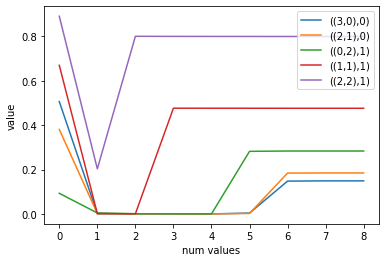

In [32]:
# Eval Alg.
p = 0.8
GAMMA = 0.9
SMALL_ENOUGH = 1e-3

# for a probability p
env = ENV(p=p)

value, policy, value_track, policy_track, num_iter = Train_PolicyIteration(env, GAMMA, SMALL_ENOUGH)

v1, v2, v3, v4, v5 = [], [], [], [], []
for i in range(len(value_track)):
    v1.append(value_track[i][((3,0),0)])
    v2.append(value_track[i][((2,1),0)])
    v3.append(value_track[i][((0,2),1)])
    v4.append(value_track[i][((1,1),1)])
    v5.append(value_track[i][((2,2),1)])
plt.plot(v1, label='((3,0),0)')
plt.plot(v2, label='((2,1),0)')
plt.plot(v3, label='((0,2),1)')
plt.plot(v4, label='((1,1),1)')
plt.plot(v5, label='((2,2),1)')
plt.xlabel('num values')
plt.ylabel('value')
plt.legend()

<div dir="rtl"> <font size="4" face="HM XNiloofar">
ابتدا value ها یک مقدار رندم دارند.
اما با شروع الگوریتم در هر مرحله مقدار value ها به روز رسانی میشوند و پس از همگرا شدن value ها Policy به روزرسانی میشود. این روند تا زمانی که هیچ policy ای به روزرسانی نشود ادامه خواهد داشت. همان طور که در نمودار میبینید، استیت های نزدیک به استیت نهایی(پیدا کردن گنج در صورت داشتن کلید) سریع تر به مقدار به نهایی خود رسیده اند.
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell زیر عملکرد الگوریتم شما را در یک بازی نشان می‌دهد.
</font> </div>

In [33]:
# gif
GAMMA = 0.9; SMALL_ENOUGH = 1e-3

env = ENV(p=0.8)
_, policy, _, _, _= Train_PolicyIteration(env, GAMMA, SMALL_ENOUGH)
states_track, reward_sum, num_step = EVAL(env, policy)

gif(env, states_track, 1)

--------------------------------
       |       |    +  |       |
--------------------------------
       |       |    #  |    #  |
--------------------------------
       |       |       |   A$  |
--------------------------------
       |       |       |       |


## 6. Effects of the discount factor $\gamma$

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell زیر تاثیر انتخاب مقدار <code>GAMMA</code> بر <code>policy</code> بهینه در محیط‌های مختلف را بررسی می‌کند. نتایج را آنالیز کنید.
    <br />
چرا نتایج تقارن ندارد؛ یعنی عملکرد Agent در <code>ENV(p=p)</code> و <code>ENV(p=1-p)</code> یکسان نیست.
     <br />
 <code>cumulative reward</code>  یا پاداش تجمعی در یک episode به معنی جمع تمام پاداش‌ها بدون احتساب گاما است.   
 </font> </div>

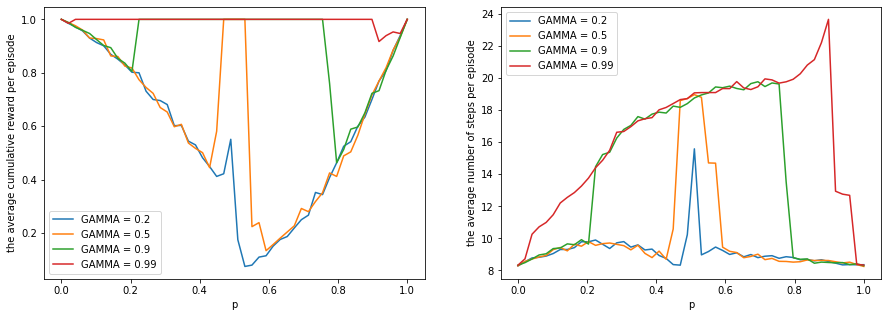

In [34]:
# EVAL the optimal policy
p_list2 = np.linspace(0.,1.,50)
GAMMA_list = [0.2, 0.5, 0.9, 0.99]; SMALL_ENOUGH = 1e-3

fig, ax = plt.subplots(1, 2, figsize=(15,5))
for GAMMA in GAMMA_list:
    r_list = []
    n_list = []
    for p in p_list2:
        env = ENV(p=p)
        _, policy, _, _, _= Train_PolicyIteration(env, GAMMA, SMALL_ENOUGH)

        num_test = 1000
        total_reward = 0.0
        total_num_step = 0
        for t in range(num_test):
            states_track, reward_sum, num_step = EVAL(env, policy); total_reward += reward_sum; total_num_step += num_step;
        r_list.append(total_reward / num_test)
        n_list.append(total_num_step / num_test)

    ax[0].plot(p_list2, r_list, label=f"GAMMA = {GAMMA}")
    ax[1].plot(p_list2, n_list, label=f"GAMMA = {GAMMA}")

ax[0].set_xlabel('p')
ax[0].set_ylabel('the average cumulative reward per episode')
ax[1].set_xlabel('p')
ax[1].set_ylabel('the average number of steps per episode')
ax[0].legend()
ax[1].legend()
plt.show()

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
همان طور که از نمودار ها پیداست در p های میانی(یعنی انتخاب کاملا تصادفی بین دو اکشن موجود) میزان پاداش تجمعی به کمترین میزان و تعداد گام به مقدار بیشینه خود میرسد. دلیل این امر همان انتخاب کاملا تصادفی است که موجب میشود ایجینت به صورت سرراست به مقصود خود نرسد و حتی در چاله گرفتار شود.

از طرف دیگر هر چه گاما بیشتر بوده تعداد استپ بیشتری توجه ایجینت به طور میانگین طی شده که با توجه به این که گاما ضریب تاثیر ریوارد است و هر چه گام بیشتری طی شود ریوارد کمتری دریافت میشود منطقی است.

با توجه به نوع تعریف و اثر p بر روی اکشن ها
شاهد تقارنی روی محیط p و 
یک منهای p نیستیم. حتی اکشن ها هم نسبت به p متقارن نیستند و بنابراین لزومی ندارد محیط نسبت به p متقارن باشد. اما شاهد عملکرد کلی یکسانی هستیم.
</font> </div>

## 7. Case $\gamma = 1$

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
کارکرد الگوریتم خود را برای <code>GAMMA = 1</code> بررسی کنید. اگر الگوریتم شما همگرا نمی‌شود دلیل آن را ذکر کنید.
 </font> </div>

In [35]:
# gif
GAMMA = 1.0; SMALL_ENOUGH = 1e-3

env = ENV(p=1.0)
value1, policy, _, _, _= Train_PolicyIteration(env, GAMMA, SMALL_ENOUGH)
states_track, reward_sum, num_step = EVAL(env, policy)

gif(env, states_track, 1)

--------------------------------
       |       |    +  |       |
--------------------------------
       |       |    #  |    #  |
--------------------------------
       |       |       |   A$  |
--------------------------------
       |       |       |       |


In [36]:
env.visual_state_date(policy)
env.visual_state_date(value1)

--------------------------------        --------------------------------        
   R   |   R   |   R-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   U#  |   D#  |           D   |   D   |   R#  |   L#  |        
--------------------------------        --------------------------------        
   R   |   U   |   L   |   L$  |           R   |   R   |   R   |   D$  |        
--------------------------------        --------------------------------        
   U   |   R   |   U   |   L   |           U   |   R   |   U   |   U   |        
--------------------------------        --------------------------------        
 1.61  | 1.61  | 1.61 -| 1.61  |         1.61  | 1.61  | 1.61 +| 1.61  |        
--------------------------------        --------------------------------        
 1.61  | 1.61  | 0.81 #| 0.11 #|         1.61  | 1.61  | 0.79 #| 0.96 #|        
----------------------------

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
همان طور که از شکل سلول دوم پیداست، ولیو همه ی استیت ها به جز استیت های نهایی برابر شده است که با توجه به این که گاما برابر ۱ است گویی طی مسافت بیشتر توسط ایجنت مجازاتی به همراه ندارد. بنابراین ممکن است در استپ های بیشتری به مقصود نهایی برسیم.
 </font> </div>

In [37]:
# save the true value to compare with other algorithms
p_list = [1.0, 0.8, 0.6, 0.2]
GAMMA = 1.0
SMALL_ENOUGH = 1e-3

save_value = {p: Train_PolicyIteration(ENV(p=p), GAMMA, SMALL_ENOUGH)[0] for p in p_list}

---

# C. Value Iteration


<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در این قسمت می‌خواهیم الگوریتم Value Iteration را پیاده‌سازی کنیم. اساس این الگوریتم به صورت زیر است:
</font> </div>

**The used Bellman equation:**

Recursive for $V$ in $\pi_{*}$:

$V_{*}(s) = \max_a \sum_{s' \in S} p(s'|s,a) \Big(r(s,a,s') + \gamma V_{*}(s') \Big)$

Note ([Wikipedia]): For all final states $s_{f}$, $V(s_{f})$ and $Q(s_{f},a)$ are never updated, but is set to the reward value $r$ observed for state $s_{f}$. In most cases, $V(s)$ and $Q(s_{f},a)$ can be taken to equal zero.

[Wikipedia]: https://en.wikipedia.org/wiki/Q-learning

## 1. Implement Value Iteration Algorithm

<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم Value Iteration را پیاده‌سازی کنید:
</font> </div>

```python
value, policy, value_track, num_iter = Train_ValueIteration(env, GAMMA=0.9, SMALL_ENOUGH=1e-3)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">
این تابع به عنوان ورودی محیط بازی، گاما و استانه توقف الگوریتم را دریافت می‌کند و در خروجی <code>value</code>  بهینه، <code>policy</code> بهینه، لیست تاریخچه <code>value</code>  به روز شده بعد هر بار loop  بر روی تمام استیت‌ها و تعداد تکرارهای انجام شده (هر به روزرسانی در <code>value</code> یک استیت یک تکرار است) را می‌دهد.
</font> </div>

In [71]:
# Value Iteration Alg.

def Train_ValueIteration(env, GAMMA=0.9, SMALL_ENOUGH=1e-3):
    value_track = []
    num_iter = 0

    # Initialization --------------------------------------------------
    value = {} # TODO
    value = {state:np.random.rand() for state in env.state_space}
    # terminal states values should be zero
    for item in env.state_space.items():
        if item[1] == True:
            value[item[0]] = 0.0

    policy = {state:'U' for state in env.state_space}
    
    # track
    value_track.append(value.copy())

    # Value Iteration --------------------------------------------------
    # TODO
    num_iter = 0

    while True:
        delta = 0
        for s in list(env.state_space.keys()):            
            old_v = value[s]
            new_v = 0
            
            for a in list(env.action_space.keys()): #actions[s]:
                v = 0

                #Calculate the value
                for item in env.probability_space[(s, a)].items():
                    (next_state, reward) = item[0]
                    prob = item[1]
                    
                    v = v + prob * (reward + (GAMMA * value[next_state]))
                # Compute a deterministic optimal policy ---------------------------
                # we update the policy at each iteration. It has same effect if we find optimal policy at last.
                # TODO
                if v > new_v: 
                    new_v = v
                    policy[s] = a    


            value[s] = new_v
            delta = max(delta, np.abs(old_v - value[s]))

        #See if the loop should stop now         
        if delta < SMALL_ENOUGH:
            break
        num_iter += 1
        value_track.append(value.copy())

    return value, policy, value_track, num_iter

## 2. Analyze the results

<div dir="rtl"> <font size="4" face="HM XNiloofar">
Cell زیر را اجرا کنید و نتایج آن (همگرایی، تعداد تکرار، <code>value</code>  بهینه و <code>policy</code> بهینه در هر <code>p</code>) را با الگوریتم Policy Iteration مقایسه کنید.
</font> </div>

In [72]:
# Eval Alg.
p_list = [1.0, 0.8, 0.6, 0.2]
GAMMA = 0.9; SMALL_ENOUGH = 1e-3


num_test = 100
for p in p_list:
    
    # for a probability p
    env = ENV(p=p)
    opt_value_track = []
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, value_track, num_iter = Train_ValueIteration(env, GAMMA, SMALL_ENOUGH)
        opt_value_track.append(value)
        number_of_iteration += num_iter
    
    # visual
    print(f"p = {p} "+90*'~')
    print(f"convergence = {all(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() <= 1e-4 for element in opt_value_track)} | number of iteration = {number_of_iteration / num_test}")
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
convergence = False | number of iteration = 8.95
--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.59 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        --

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">

همگرایی:‌ در همه ی p ها با مقایسه ی جدول value ها
میتوان دید که value ها در هر دو روش تقریبا به اعداد نزدیکی همگرا شده اند. policy با توجه به مقدار برابر(نزدیک به هم) برای اکشن های مختلف به در برخی نقاط محدود تفاوت دارند.

تعداد تکرار: در p های برابر
policy iteration تعداد تکرار کمتری دارد.


</font> </div>

## 3. Plot $V_{\pi_k}(s)$ vs $k$


<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم خود را برای محیط با پارامتر <code>p=0.8</code> اجرا کنید. نمودار مقدار <code>value</code> استیت‌های زیر را در Initialization و بعد اجرای هر بار loop بر روی تمام استیت‌ها رسم کنید. همه‌ی نمودار‌ها را در یک plot رسم کنید. نتایج را آنالیز و با نمودار مشابه در قسمت Policy Iteration مقایسه کنید.
</font> </div>

```python
States: ((3,0),0), ((2,1),0), ((0,2),1), ((1,1),1), ((2,2),1)
```


**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">
همان طور که از نمودار ها پیداست، در این روش ولیو ها ابتدا افزایش یافته اند و سپس در ایتریشن های بعدی کاهش یافته اند تا به سمت مقدار بهینه خود حرکت کنند که با توجه به روش الگوریتم که انتخاب اکشنیست که ولیو استیت را ماکس کند منطقی است. 

اما در روش policy iteration
ابتدار ولیو ها کاهش مییابند تا به مقدار کمی برسند و در نهایت به سمت ولیو نهایی همگرا شوند.
</font> </div>

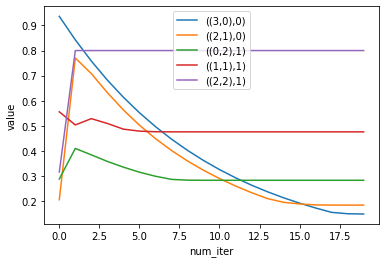

In [74]:
# Eval Alg.
p = 0.8
GAMMA = 0.9
SMALL_ENOUGH = 1e-3

# for a probability p
env = ENV(p=p)

value, policy, value_track, num_iter = Train_ValueIteration(env, GAMMA, SMALL_ENOUGH)

v1, v2, v3, v4, v5 = [], [], [], [], []
for i in range(len(value_track)):
    v1.append(value_track[i][((3,0),0)])
    v2.append(value_track[i][((2,1),0)])
    v3.append(value_track[i][((0,2),1)])
    v4.append(value_track[i][((1,1),1)])
    v5.append(value_track[i][((2,2),1)])
plt.plot(v1, label='((3,0),0)')
plt.plot(v2, label='((2,1),0)')
plt.plot(v3, label='((0,2),1)')
plt.plot(v4, label='((1,1),1)')
plt.plot(v5, label='((2,2),1)')
plt.xlabel('num_iter')
plt.ylabel('value')
plt.legend()

---

# D. Q-Learning

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در این قسمت می‌خواهیم الگوریتم Q-Learning را پیاده‌سازی کنیم. اساس این الگوریتم به صورت زیر است:
</font> </div>


**The used Bellman equation:**

Recursive for $Q$ in $\pi_{*}$:

$Q_{*}(s,a) \overset{model-based}{=} \sum_{s' \in S} p(s'|s,a) \Big(r(s,a,s') + \gamma \max_{a'}Q_*(s',a') \Big)  \overset{model-free}{=} \mathbb{E} [R + \gamma \max_{a'}Q_*(S',a')]$


The agent doesn't know $p(s'|s,a)$ and $r(s',s,a)$.

[Wikipedia]: The agent receives $s_t$, then chooses an action $a_{t}$. The environment moves to a new state $s_{t+1}$ and the reward $r_{t+1}$ associated with the transition $(s_{t},a_{t},s_{t+1})$ is determined. The goal of reinforcement learning is to learn a policy: $\pi :A\times S\rightarrow [0,1]$, $\pi (a,s)=\Pr(a_{t}=a\mid s_{t}=s)$ which maximizes the expected cumulative reward. The core of the algorithm is a Bellman equation as a simple value iteration update, using the weighted average of the old value and the new information:

[Wikipedia]: https://en.wikipedia.org/wiki/Q-learning


$ Q^{new}(s_{t},a_{t})\leftarrow \underbrace {Q(s_{t},a_{t})} _{\text{old value}}+\underbrace {\alpha } _{\text{learning rate}}\cdot \overbrace {{\bigg (}\underbrace {\underbrace {r_{t+1}} _{\text{reward}}+\underbrace {\gamma } _{\text{discount factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\text{estimate of optimal future value}}} _{\text{new value (temporal difference target)}}-\underbrace {Q(s_{t},a_{t})} _{\text{old value}}{\bigg )}} ^{\text{temporal difference}}$

How to update $Q(s,a)$?

**1) Exploration and then Exploitation:**

**By Loop:**
```python
init Q 
# For all final states s_f in final_states, Q(s_f,a) is never updated, but is set to the reward value r observed for state s_f. 
# In most cases, Q(s_f,a) can be taken to equal zero. 

while doesnt converge:
  for s in S:
    for a in A:
      # the environment reaction
      s_new, r = env.move(s,a)
      # update Q(s,a)
      Q(s,a) += alpha * (r + gamma * max(Q(s_new,:)) - Q(s,a))
```


**2) Exploration and Exploitation, at the same time:**

**Play a game!**
```python
init Q 
# For all final states s_f in final_states, Q(s_f,a) is never updated, but is set to the reward value r observed for state s_f. 
# In most cases, Q(s_f,a) can be taken to equal zero. 

while doesnt converge:
  # play a game!
  s = random start state
  # a <- policy(Q(s,:)) can be random policy or epsilon-greedy or softmax, etc.
  while not s in final_states:
    # the agent action in state s
    a = policy(Q(s,:))
    # the environment reaction
    s_new, r = env.step(a)
    # update Q(s,a)
    Q(s,a) += alpha * (r + gamma * max(Q(s_new,:)) - Q(s,a))
    # update state
    s = s_new
```

Indeed, `policy(Q(s,:))` in Q-Learning is *the behavior policy*, not the target policy.

## 1. Implement Q-Learning Algorithm

<div dir="rtl"> <font size="4" face="HM XNiloofar">
الگوریتم Q-Learning را به صورت کاوش و بهره‌برداری همزمان پیاده‌سازی کنید:
</font> </div>

```python
value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA=0.9, ALPHA=0.1, max_step_per_episode=100, eps_max=1.0, eps_min=0.0, eps_num_explore=1000, eps_num_explore_exploit=8000, max_num_episode=1000)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">
این تابع به عنوان ورودی محیط بازی، گاما، نرخ یادگیری، حداکثر تعداد step برای هرepisode، حداکثر مقدار epsilon، حداقل مقدار epsilon، تعداد step ای که epsilon بر روی مقدار حداکثر خود است، تعداد step ای که epsilon به صورت خطی از مقدار بیشینه به کمینه می‌رسد و تعداد episode ای که در الگوریتم اجرا می‌شود را دریافت می‌کند و در خروجی <code>value</code>  بهینه، <code>policy</code> بهینه، لیست reward تجمعی هر episode، لیست شماره‌ی step ای که هر episode در آن پایان یافته و لیست استیتی که هر episode با آن پایان یافته است را می‌دهد.
</font> </div>

In [138]:
# Q Learning Alg.

def Train_QLearning(env, GAMMA=0.9, ALPHA=0.1, max_step_per_episode=100, eps_max=1.0, eps_min=0.0, eps_num_explore=1000, eps_num_explore_exploit=8000, max_num_episode=1000):
    reward_episode_track = []
    i_step = 0
    i_step_episode_track = []
    final_state_track = []

    # Initialization --------------------------------------------------
    # set a random Q 
    Q = None # TODO
    Q = {(state, action):np.random.rand() for state in env.state_space for action in list(env.action_space.keys())}
    # terminal states Q should be taken to equal zero
    for item in env.state_space.items():
        if item[1] == True:
            for act in env.action_space.keys():
                Q[item[0], act] = 0.0    

    for _ in range(max_num_episode):
        # Play a game! --------------------------------------------------
        state = env.reset()
        reward_episode_sum = 0.0
        
        done = False
        
        for num_step in range(max_step_per_episode):
            i_step += 1
            
            # ---------------------- choose action ----------------------
            # update epsilon
            # TODO
            if i_step < eps_num_explore:
                eps = eps_max
            elif i_step < (eps_num_explore + eps_num_explore_exploit):
                eps = eps - (eps_max-eps_min)/(eps_num_explore_exploit)
            else:
                eps = eps_min

            
            # epsilon greedy
            # TODO
            if np.random.uniform(0,1) < eps:
                action = np.random.choice(list(env.action_space.keys()))
            else:
                max = -np.inf
                for act in env.action_space.keys():
                    if Q[state, act] > max:
                        max = Q[state, act]
                        action = act

            # ---------------------- do the step ----------------------
            # TODO
            next_state, reward, done = env.step(action)
            reward_episode_sum += reward
            
            # ------------------------ update Q ------------------------
            # TODO
            # find max_a Q(s_t+1, a)
            max = -np.inf
            for act in env.action_space.keys():
                if Q[next_state, act] > max:
                    max = Q[next_state, act]
            
            Q[state, action] = Q[state, action] + ALPHA * (reward + GAMMA * max - Q[state, action])
            
            # -------------------- go to next_state --------------------
            # TODO
            state = next_state            
            # ------------------------- if done -------------------------
            if done:
                break
        reward_episode_track.append(reward_episode_sum)
        i_step_episode_track.append(i_step + 1)
        final_state_track.append(state)
    
    # Compute optimal values and a deterministic optimal policy --------------------------------------------------
    # TODO
    value = {}
    policy = {}
    for s in list(env.state_space.keys()):
        max = -np.inf
        for act in env.action_space.keys():
            if Q[s, act] > max:
                max = Q[s, act]
                action = act    
        value[s] = max
        policy[s] = action
    
    return value, policy, reward_episode_track, i_step_episode_track, final_state_track


## 2. Analyze the results

<div dir="rtl"> <font size="4" face="HM XNiloofar"> Cell
 زیر را اجرا کنید و به طور مفصل نتایج آن (همگرایی، تعداد تکرار، reward  تجمعی هر episode، تعداد step هر episode، مقدار <code>value</code>  بهینه و <code>policy</code> بهینه در هر <code>p</code>) را تجزیه و تحلیل و با الگوریتم‌های قبلی مقایسه کنید.
</font> </div>

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE convergence = 1.73108 | number of iteration = 12758.0


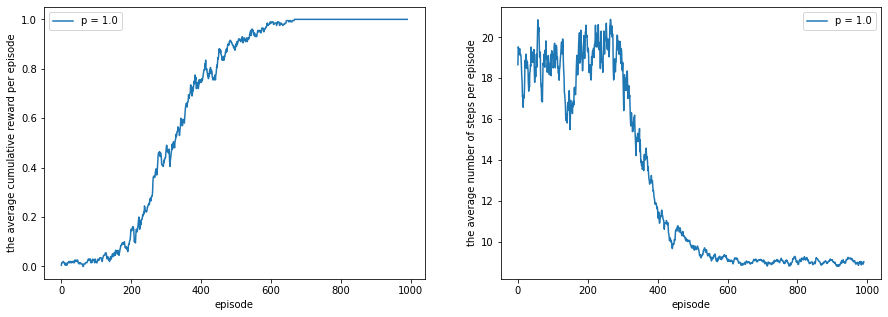

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.78 -| 0.59  |         0.50  | 0.73  | 0.66 +| 0.48  |        
--------------------------------        --------------------------------        
 0.47  | 0.53  | 0.00 #| 0.00 #|         0.59  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.32 $|         0.72  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.38  | 0.43  | 0.39  | 0.34  |         0.72  | 0.80  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

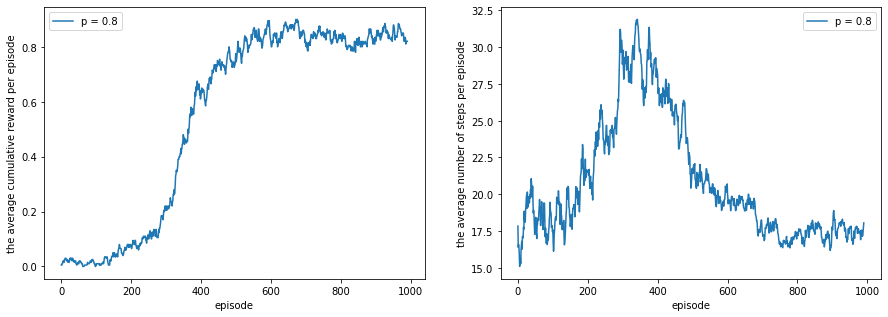

--------------------------------        --------------------------------        
 0.19  | 0.20  | 0.99 -| 0.17  |         0.43  | 0.40  | 0.25 +| 0.19  |        
--------------------------------        --------------------------------        
 0.17  | 0.18  | 0.00 #| 0.00 #|         0.48  | 0.46  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.15  | 0.17  | 0.15  | 0.14 $|         0.53  | 0.65  | 0.77  | 0.00 $|        
--------------------------------        --------------------------------        
 0.14  | 0.15  | 0.14  | 0.13  |         0.59  | 0.72  | 0.82  | 0.93  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   U   |           D   |   L   |   L+  |   R   |        
--------------------------------        --------------------------------        
   D   |   U   |   R#  |   R#  |           D   |   L   |   R#  |   R#  |        
----------------------------

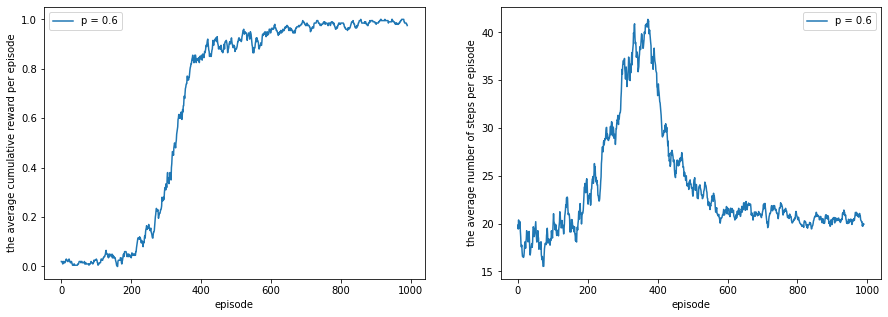

--------------------------------        --------------------------------        
 0.22  | 0.25  | 0.62 -| 0.25  |         0.39  | 0.39  | 0.31 +| 0.25  |        
--------------------------------        --------------------------------        
 0.19  | 0.21  | 0.00 #| 0.00 #|         0.44  | 0.47  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.15  | 0.17  | 0.13  | 0.11 $|         0.53  | 0.63  | 0.83  | 0.00 $|        
--------------------------------        --------------------------------        
 0.13  | 0.13  | 0.12  | 0.10  |         0.55  | 0.64  | 0.76  | 0.86  |        
--------------------------------        --------------------------------        
   R   |   R   |   L-  |   U   |           D   |   L   |   U+  |   U   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   L   |   R#  |   R#  |        
----------------------------

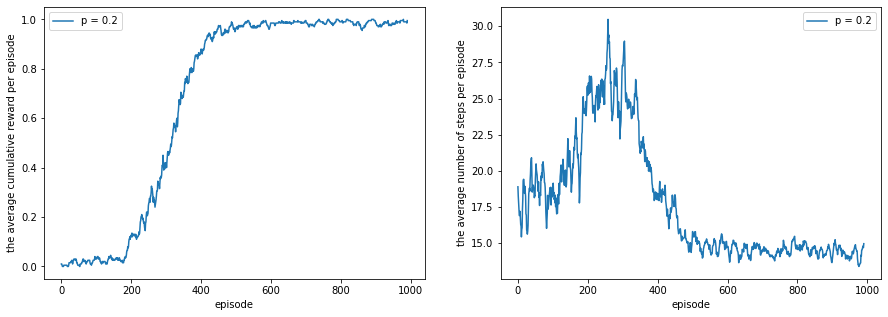

--------------------------------        --------------------------------        
 0.37  | 0.44  | 0.83 -| 0.45  |         0.52  | 0.59  | 0.51 +| 0.42  |        
--------------------------------        --------------------------------        
 0.31  | 0.31  | 0.00 #| 0.00 #|         0.60  | 0.68  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.26  | 0.25  | 0.18  | 0.15 $|         0.67  | 0.78  | 0.87  | 0.00 $|        
--------------------------------        --------------------------------        
 0.23  | 0.21  | 0.18  | 0.16  |         0.59  | 0.64  | 0.64  | 0.79  |        
--------------------------------        --------------------------------        
   D   |   D   |   L-  |   U   |           D   |   L   |   U+  |   D   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           L   |   L   |   R#  |   R#  |        
----------------------------

In [83]:
# Eval Alg.
p_list = [1.0, 0.8, 0.6, 0.2]
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for p in p_list:
    
    # for a probability p
    env = ENV(p=p)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"p = {p} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("MSE convergence = {:.5f} | number of iteration = {}".format(MSE,number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

همان طور که مشاهده میشود این الگوریتم نیز مانند روش های قبلی همگرا میشود. تعداد تکرار در این روش با توجه به این که مدل را نمیداند به طور قابل توجهی افزایش یافته است. reward تجمعی در هر 
اپیزود به مقدار نهایی یعنی ۱ نزدیک شده است( برای p=1 دقیقا برابر ۱ شده که با توجه به این که ایجنت لغزشی ندارد منطقیست.).
مقدار value بهینه
در نقاط کلیدی و پرتردد توسط ایجینت در این روش و روش های قبلی تقریبا برابر شده است اما در نقاط دیگر ولیو ها با ولیو بهینه فاصله دارد که هر چه p کمتر شده است این فاصله کمتر شده(در اپیزود ها از این نقاط عبور داشتیم و موجب به روزرسانی ولیو ها شده است.) که اثر این را در کمتر بودن پارامتر MSE convergence 
در p = 0.2 نسبت به سایر p ها شاهد هستیم.
policy بهینه در برخی نقاط محدود با روش اول تفاوت دارند.
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell زیر عملکرد الگوریتم شما را در یک بازی نشان می‌دهد.
</font> </div>

In [84]:
# gif
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

env = ENV(p=0.8)
value, policy, _, _, _ = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
states_track, reward_sum, num_step = EVAL(env, policy)

gif(env, states_track, 1)

--------------------------------
       |       |    +  |       |
--------------------------------
       |       |    #  |    #  |
--------------------------------
       |       |       |   A$  |
--------------------------------
       |       |       |       |


## 3. Effects of $\alpha$ and $\varepsilon$

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    تاثیر پارامتر‌های <code>ALPHA</code> و epsilon های مختلف را بر کارکرد الگوریتم بررسی کنید.
</font> </div>


epsilon = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE convergence = 1.80136 | number of iteration = 18212.5


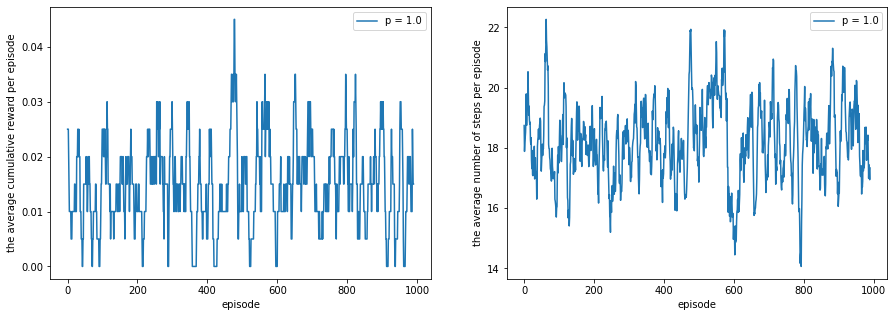

--------------------------------        --------------------------------        
 0.46  | 0.51  | 0.81 -| 0.54  |         0.63  | 0.64  | 0.57 +| 0.51  |        
--------------------------------        --------------------------------        
 0.41  | 0.46  | 0.00 #| 0.00 #|         0.70  | 0.71  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.37  | 0.41  | 0.37  | 0.33 $|         0.77  | 0.80  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.33  | 0.37  | 0.33  | 0.30  |         0.66  | 0.76  | 0.85  | 0.85  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   R   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   U   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

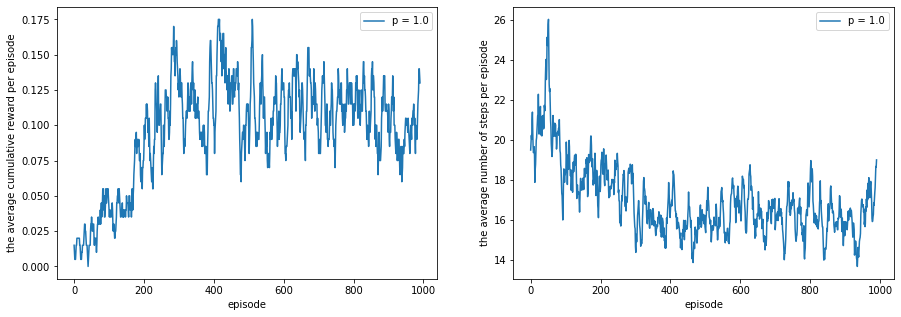

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.62 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.72  | 0.81  | 0.89  | 0.93  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

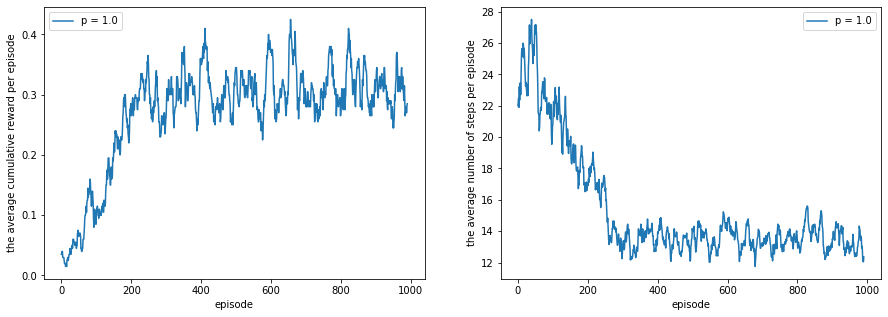

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.84 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.72  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

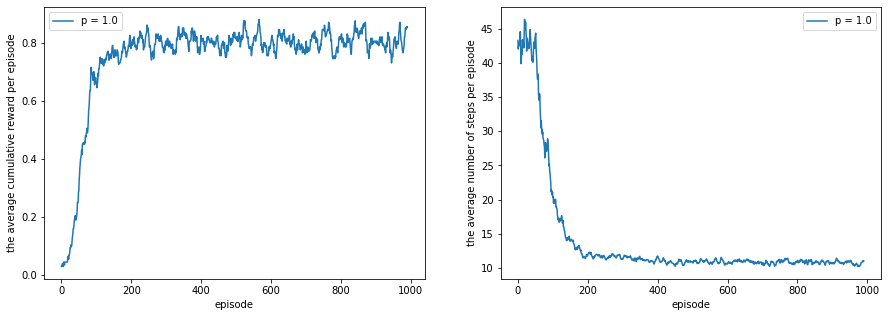

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.70 -| 0.59  |         0.65  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.31 $|         0.65  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 0.71  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           R   |   D   |   R#  |   R#  |        
----------------------------

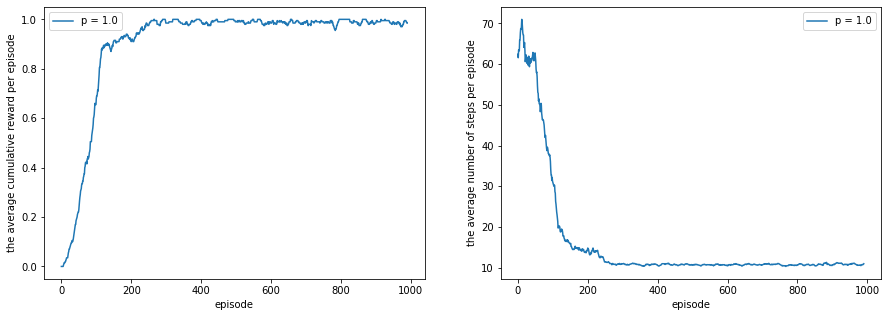

--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.88 -| 0.48  |         0.54  | 0.59  | 0.53 +| 0.50  |        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.00 #| 0.00 #|         0.41  | 0.66  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.35  | 0.31  | 0.28  | 0.23 $|         0.53  | 0.73  | 0.81  | 0.00 $|        
--------------------------------        --------------------------------        
 0.25  | 0.28  | 0.25  | 0.23  |         0.39  | 0.51  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           R   |   D   |   L+  |   U   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

In [86]:
# effect of epsilon
p = 1.0
e_list = [1.0, 0.8, 0.6, 0.2, 0.01]
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for eps in e_list:
    eps_max = eps
    eps_min = eps
    # for a probability p
    env = ENV(p=p)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"epsilon = {eps} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("MSE convergence = {:.5f} | number of iteration = {}".format(MSE,number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

ALPHA = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE convergence = 1.61334 | number of iteration = 11222.85


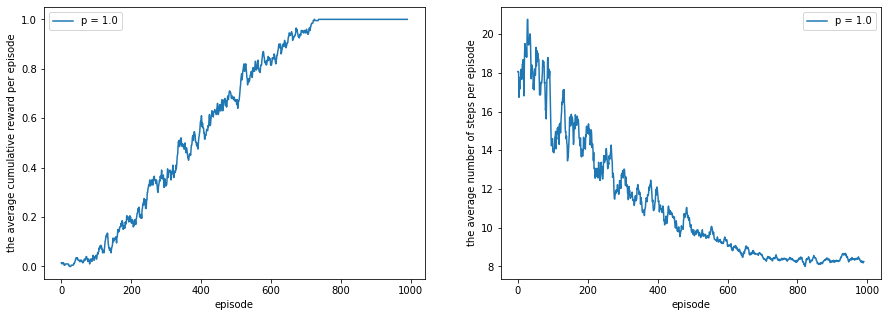

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.78 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   D-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           R   |   D   |   R#  |   R#  |        
----------------------------

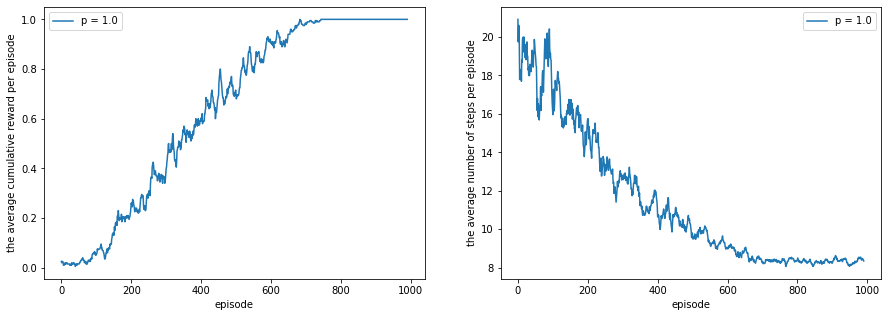

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.81 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   U   |   U   |   R#  |   R#  |           R   |   D   |   R#  |   R#  |        
----------------------------

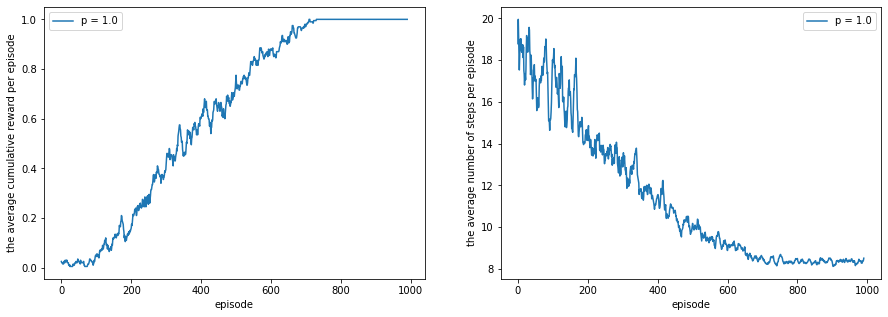

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.57 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.39 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.73  | 0.81  | 0.90  | 1.00  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   L   |           R   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   U   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

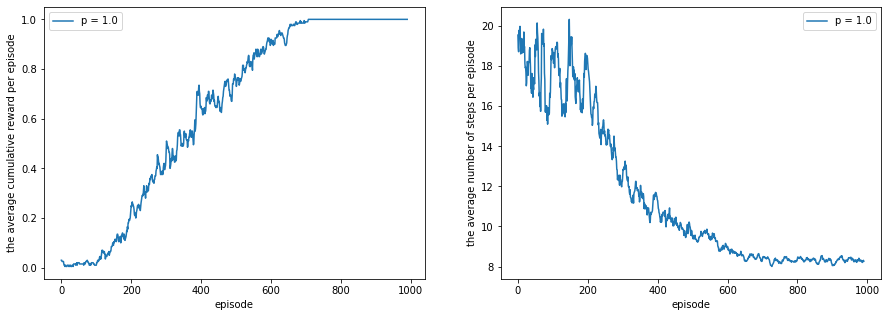

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.76 -| 0.59  |         0.66  | 0.73  | 0.66 +| 0.59  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.73  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.36 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.68  | 0.81  | 0.84  | 0.98  |        
--------------------------------        --------------------------------        
   R   |   R   |   L-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           R   |   D   |   R#  |   R#  |        
----------------------------

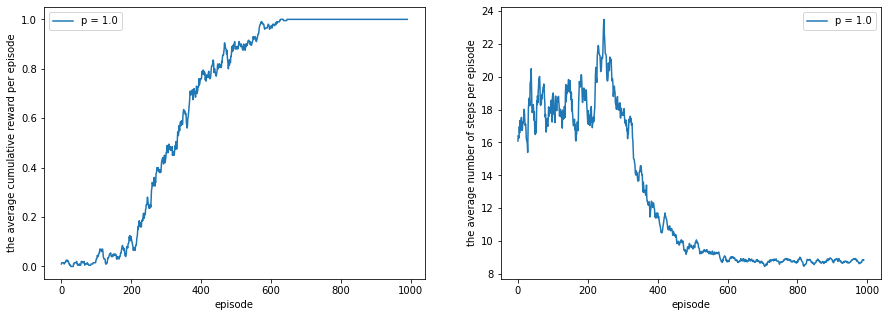

--------------------------------        --------------------------------        
 0.53  | 0.59  | 0.81 -| 0.59  |         0.62  | 0.73  | 0.66 +| 0.56  |        
--------------------------------        --------------------------------        
 0.48  | 0.53  | 0.00 #| 0.00 #|         0.72  | 0.81  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.43  | 0.48  | 0.43  | 0.37 $|         0.81  | 0.90  | 1.00  | 0.00 $|        
--------------------------------        --------------------------------        
 0.39  | 0.43  | 0.39  | 0.35  |         0.67  | 0.79  | 0.90  | 0.83  |        
--------------------------------        --------------------------------        
   R   |   R   |   L-  |   L   |           D   |   D   |   L+  |   L   |        
--------------------------------        --------------------------------        
   R   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

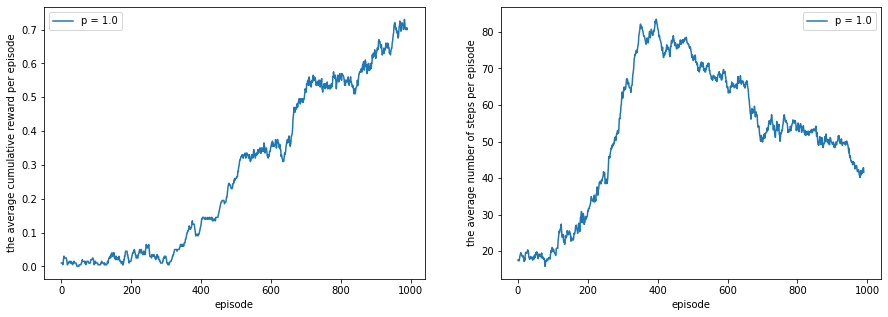

--------------------------------        --------------------------------        
 0.28  | 0.28  | 0.70 -| 0.48  |         0.30  | 0.24  | 0.25 +| 0.25  |        
--------------------------------        --------------------------------        
 0.28  | 0.28  | 0.00 #| 0.00 #|         0.37  | 0.41  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.28  | 0.28  | 0.28  | 0.28 $|         0.38  | 0.39  | 0.39  | 0.00 $|        
--------------------------------        --------------------------------        
 0.28  | 0.28  | 0.28  | 0.28  |         0.24  | 0.86  | 0.92  | 0.95  |        
--------------------------------        --------------------------------        
   D   |   U   |   L-  |   U   |           D   |   L   |   U+  |   R   |        
--------------------------------        --------------------------------        
   L   |   D   |   R#  |   R#  |           D   |   L   |   R#  |   R#  |        
----------------------------

In [133]:
# effect of ALPHA
p = 1.0
alpha_list = [1.0, 0.8, 0.6, 0.2, 0.1, 0.01]
GAMMA=0.9; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for ALPHA in alpha_list:
    # for a probability p
    env = ENV(p=p)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"ALPHA = {ALPHA} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("MSE convergence = {:.5f} | number of iteration = {}".format(MSE,number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در اپسیلون های بالا(هر چه اپسیلون بیشتر یعنی اکشن ما با احتمال بیشتری تصادفی انتخاب میشود) با توجه به این که انتخاب ها تصادفی است، ایجینت توان یادگیری ندارد و بنابراین ریوارد تجمعی در نهایت نزدیک صفر خواهد بود(برای اپسیلون برابر ۱). اما هر چه اپسیلون کمتر شود یعنی حرکت به سمت انتخاب اکشن با ایجاد Q بیشتر که نهایتا منجر به یادگیری ایجینت شده و ریوارد تجمعی در مقدار بالاتری همگرا میشود که در اپسیلون برابر 0.01 میبینیم که ریوارد تجمعی به حدود ۱ همگرا شده است.

آلفاهای پایین به این معنیست که نرخ یادگیری مقدار کمتریست و بنابراین Q ها با سرعت کمتری به روزرسانی میشوند. 
</font> </div>

## 4. Using random policy

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در کلاس درس شما با الگوریتم Q-Learning به صورتی آشنا شدید که  Agent برای انتخاب اکشن در هر گام از epsilon-greedy-policy استفاده می‌کند. اگر ما به جای epsilon-greedy-policy از random-policy (یعنی در هر گام کاملا تصادفی و بدون توجه به مقادیر value یک اکشن انتخاب شود) استفاده کنیم، آیا الگوریتم می‌تواند به مقادیر Q بهینه همگرا شود؟ در مورد الگوریتم SARSA چطور؟ توضیح دهید.
</font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در q lerning 
همگرا میشود. شرط همگرا شدن این است که بی نهایت بار استیت ها و اکشن های مختلف دیده شوند که در این روش این اتفاق می افتد و در آخر policy با انتخاب حریصانه انتخاب میشود. 

اما در SARSA این اتفاق نمی افتد زیرا یک الگوریتم on-policy است و در انتخاب random تابع Q را یاد میگیرد.
</font> </div>

## 5. Design $r(s)$ and $\gamma$

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    در <code>GAMMA = 0.9</code> متغیر <code>rewards</code> بازی را طوری تغییر دهید که الگوریتم‌های پیاده‌سازی شده عملکرد بهتری داشته باشند. در اینجا عملکرد یک الگوریتم را از دو نظر بررسی کنید.
<br />
۱) همگرایی آن‌ها به جواب سریع‌تر گردد.    
<br />    
 ۲) در طول زمان training عملکرد Agent از نظر احتمال رسیدن آن به گنج بهتر باشد.
این عملکرد در الگوریتم Policy Iteration از ارزیابی <code>policy_track</code> در خروجی، در الگوریتم Value Iteration از ارزیابی <code>value_track</code> در خروجی و در الگوریتم Q-Learning از <code>final_state_track</code> در خروحی قابل بررسی است.
<br />   
    حال چند سناریو مختلف برای <code>rewards</code> در نظر بگیرید و نتایج را به ازای <code>GAMMA</code> های مختلف از جمله <code>GAMMA = 1</code> مقایسه و آنالیز کنید.
</font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

</font> </div>

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of iteration = 15351.95


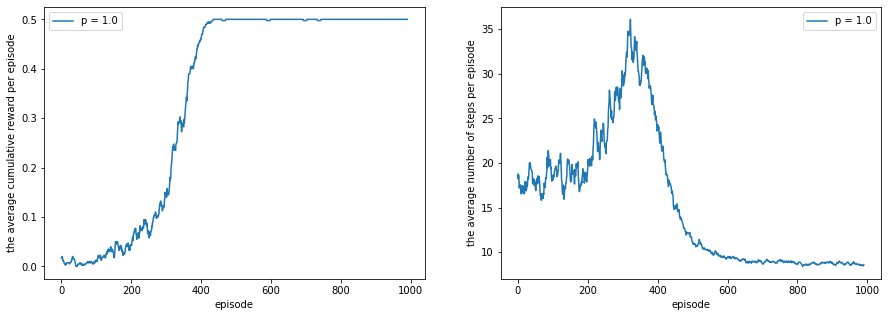

--------------------------------        --------------------------------        
 0.27  | 0.30  | 0.73 -| 0.30  |         0.38  | 0.36  | 0.33 +| 0.33  |        
--------------------------------        --------------------------------        
 0.24  | 0.27  | 0.00 #| 0.00 #|         0.40  | 0.40  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.22  | 0.24  | 0.22  | 0.19 $|         0.42  | 0.45  | 0.50  | 0.00 $|        
--------------------------------        --------------------------------        
 0.20  | 0.22  | 0.19  | 0.18  |         0.42  | 0.43  | 0.45  | 0.44  |        
--------------------------------        --------------------------------        
   R   |   R   |   R-  |   L   |           U   |   D   |   L+  |   U   |        
--------------------------------        --------------------------------        
   U   |   U   |   R#  |   R#  |           L   |   D   |   R#  |   R#  |        
----------------------------

In [147]:
r = {state: 0.5 if state == (env.coin,1) else 0.0 for state in env.state_space.keys()}

# Eval Alg.
p_list = [1.0]#, 0.8, 0.6, 0.2]
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for p in p_list:
    
    # for a probability p
    env = ENV(p=p, rewards=r)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"p = {p} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("number of iteration = {}".format(number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of iteration = 21092.8


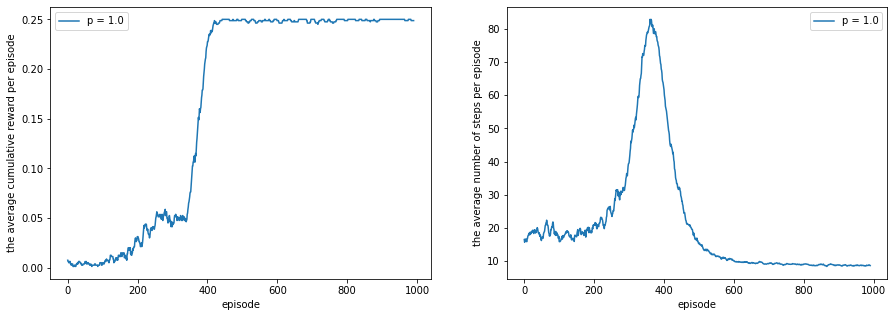

--------------------------------        --------------------------------        
 0.13  | 0.15  | 0.81 -| 0.15  |         0.19  | 0.18  | 0.16 +| 0.16  |        
--------------------------------        --------------------------------        
 0.12  | 0.13  | 0.00 #| 0.00 #|         0.20  | 0.20  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.11  | 0.12  | 0.11  | 0.10 $|         0.21  | 0.23  | 0.25  | 0.00 $|        
--------------------------------        --------------------------------        
 0.10  | 0.11  | 0.10  | 0.09  |         0.22  | 0.23  | 0.24  | 0.26  |        
--------------------------------        --------------------------------        
   R   |   R   |   U-  |   L   |           L   |   D   |   L+  |   U   |        
--------------------------------        --------------------------------        
   U   |   U   |   R#  |   R#  |           D   |   D   |   R#  |   R#  |        
----------------------------

In [149]:
r = {state: 0.25 if state == (env.coin,1) else 0.0 for state in env.state_space.keys()}

# Eval Alg.
p_list = [1.0]#, 0.8, 0.6, 0.2]
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for p in p_list:
    
    # for a probability p
    env = ENV(p=p, rewards=r)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"p = {p} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("number of iteration = {}".format(number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

p = 1.0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
number of iteration = 81621.15


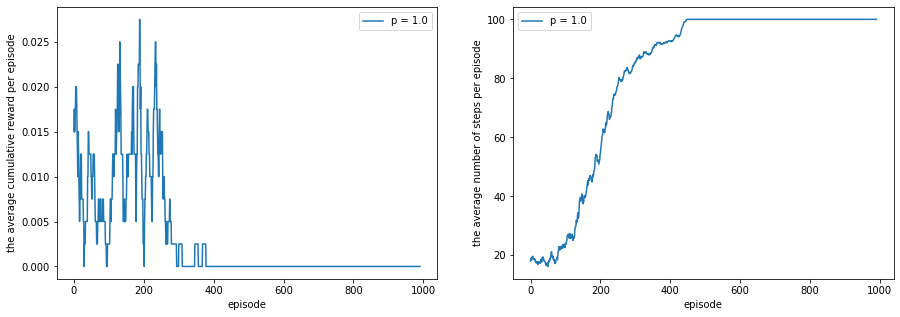

--------------------------------        --------------------------------        
 0.98  | 0.98  | 0.97 -| 0.96  |         0.57  | 0.65  | 0.69 +| 0.66  |        
--------------------------------        --------------------------------        
 0.98  | 0.98  | 0.00 #| 0.00 #|         0.81  | 0.68  | 0.00 #| 0.00 #|        
--------------------------------        --------------------------------        
 0.98  | 0.98  | 0.98  | 0.98 $|         0.87  | 0.89  | 0.62  | 0.00 $|        
--------------------------------        --------------------------------        
 0.98  | 0.98  | 0.98  | 0.98  |         0.83  | 0.86  | 0.89  | 0.51  |        
--------------------------------        --------------------------------        
   D   |   D   |   L-  |   R   |           D   |   D   |   U+  |   L   |        
--------------------------------        --------------------------------        
   D   |   D   |   R#  |   R#  |           L   |   D   |   R#  |   R#  |        
----------------------------

In [151]:
r = {state: 0.5 if state == (env.coin,1) else 0.0 for state in env.state_space.keys()}

# Eval Alg.
p_list = [1.0]#, 0.8, 0.6, 0.2]
GAMMA=1.0; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20
for p in p_list:
    
    # for a probability p
    env = ENV(p=p, rewards=r)
    opt_value_track = []
    reward_episode_track_sum = np.zeros(max_num_episode)
    num_step_episode_track_sum = np.zeros(max_num_episode)
    number_of_iteration = 0
    for t in range(num_test):
        value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
        opt_value_track.append(value)
        reward_episode_track_sum += np.array(reward_episode_track)
        num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
        number_of_iteration += i_step_episode_track[-1]
    
    # visual
    print(f"p = {p} "+90*'~')
    MSE = sum(((np.array(list(element.values())) - np.array(list(save_value[p].values())))**2).mean() for element in opt_value_track)/len(opt_value_track)
    print("number of iteration = {}".format(number_of_iteration/len(opt_value_track)))
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
    ax[0].set_xlabel('episode')
    ax[0].set_ylabel('the average cumulative reward per episode')
    ax[1].set_xlabel('episode')
    ax[1].set_ylabel('the average number of steps per episode')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    env.visual_state_date(value)
    env.visual_state_date(policy)
    print("")

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
همان طور که از نمودار ها پیداست با کاهش ریوارد نهایی سرعت همگرایی الگوریتم افزایش یافته است. 
میتوان ریوارد هر استیت را نیز غیر از استیت نهایی برابر عددی منفی قرار داد تا با مجازات ایجیت برای برداشتن گام های طولانی الگوریتم سریع تر همگرا شود.

در گاما برابر ۱ الگوریتم همگرا نمیشود.

 </font> </div>


## 6. Design a fun map!

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    به دلخواه خود یک نقشه‌ی گنج جالب طراحی کنید و ربات را با الگوریتم Q-Learning آموزش دهید. با <code>gif</code> عملکرد ربات را نشان دهید.
 </font> </div>  

**Your answer: ```TODO ```**

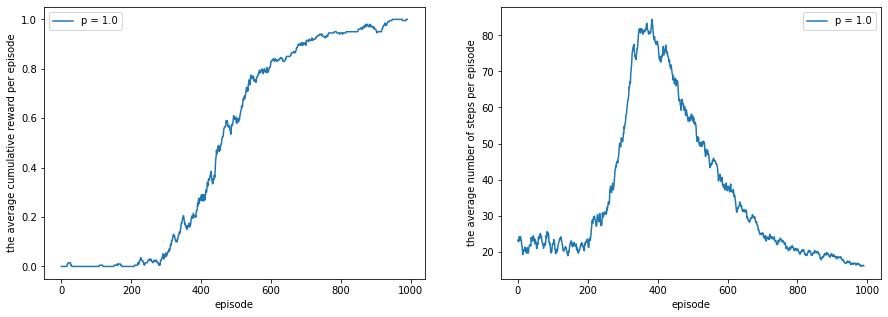

--------------------------------------------------------        --------------------------------------------------------        
 0.26  | 0.00 #| 1.00 -| 0.43  | 0.39  | 0.34  | 0.27  |         0.32  | 0.00 #| 0.48 +| 0.53  | 0.59  | 0.38  | 0.38  |        
--------------------------------------------------------        --------------------------------------------------------        
 0.33  | 0.39  | 0.43  | 0.00 #| 0.35  | 0.31  | 0.25  |         0.32  | 0.33  | 0.31  | 0.00 #| 0.66  | 0.39  | 0.38  |        
--------------------------------------------------------        --------------------------------------------------------        
 0.29  | 0.35  | 0.00 #| 0.25  | 0.31  | 0.27  | 0.22  |         0.31  | 0.32  | 0.00 #| 0.81  | 0.73  | 0.41  | 0.40  |        
--------------------------------------------------------        --------------------------------------------------------        
 0.27  | 0.31  | 0.00 #| 0.22  | 0.28  | 0.25  | 0.20  |         0.31  | 0.33  | 0.00 #| 0.90  | 

In [130]:
# Eval Alg.
p = 1.0
GAMMA=0.9; ALPHA=0.1; max_step_per_episode=100; eps_max=1.0; eps_min=0.0; eps_num_explore=1000; eps_num_explore_exploit=8000; max_num_episode=1000

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

num_test = 20

# for a probability p
env = ENV(grid=(7,7), key=(0,2), coin=(5,3), holes=[(4,2),(1,3),(2,2),(0,1),(3,2),(5,2)], p=1.0, rewards='default')
opt_value_track = []
reward_episode_track_sum = np.zeros(max_num_episode)
num_step_episode_track_sum = np.zeros(max_num_episode)
number_of_iteration = 0
for t in range(num_test):
    value, policy, reward_episode_track, i_step_episode_track, final_state_track = Train_QLearning(env, GAMMA, ALPHA, max_step_per_episode, eps_max, eps_min, eps_num_explore, eps_num_explore_exploit, max_num_episode)
    opt_value_track.append(value)
    reward_episode_track_sum += np.array(reward_episode_track)
    num_step_episode_track_sum += np.array(i_step_episode_track) - np.array([0]+i_step_episode_track[:-1])
    number_of_iteration += i_step_episode_track[-1]

# visual
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(range(max_num_episode-9), moving_average(reward_episode_track_sum/num_test, 10), label=f"p = {p}")
ax[1].plot(range(max_num_episode-9), moving_average(num_step_episode_track_sum/num_test, 10), label=f"p = {p}")
ax[0].set_xlabel('episode')
ax[0].set_ylabel('the average cumulative reward per episode')
ax[1].set_xlabel('episode')
ax[1].set_ylabel('the average number of steps per episode')
ax[0].legend()
ax[1].legend()
plt.show()
env.visual_state_date(value)
env.visual_state_date(policy)
print("")


In [131]:
states_track, reward_sum, num_step = EVAL(env, policy)

gif(env, states_track, 1)

--------------------------------------------------------
       |    #  |    +  |       |       |       |       |
--------------------------------------------------------
       |       |       |    #  |       |       |       |
--------------------------------------------------------
       |       |    #  |       |       |       |       |
--------------------------------------------------------
       |       |    #  |       |       |       |       |
--------------------------------------------------------
       |       |    #  |       |       |       |       |
--------------------------------------------------------
       |       |    #  |   A$  |       |       |       |
--------------------------------------------------------
       |       |       |       |       |       |       |


---

# Give Us Feedback

In [132]:
from ipywidgets import Label, IntSlider, Textarea, Button, HTML, Layout, HBox, VBox

IntSlider_list = {i:IntSlider(value=3, min=1, max=5) for i in range(6)}
H1 = HBox([Label("How was the homework?")])
H2 = HBox([Label("Please rate the homework from 1 to 5 (lowest to highest).")])
H3 = HBox([Label("The assignment was instructive.", layout=Layout(width="22%")), IntSlider_list[0]])
H4 = HBox([Label("It was not time consuming.", layout=Layout(width="22%")), IntSlider_list[1]])
H5 = HBox([Label("The questions were clear.", layout=Layout(width="22%")), IntSlider_list[2]])
H6 = HBox([Label("The environment was interesting.", layout=Layout(width="22%")), IntSlider_list[3]])
H7 = HBox([Label("The homework was well organized.", layout=Layout(width="22%")), IntSlider_list[4]])
H8 = HBox([Label("Finally, you had a good vibe!", layout=Layout(width="22%")), IntSlider_list[5]])
H9 = HBox([Textarea(value='', placeholder='Any comments or suggestions', description='', disabled=False)])
button = Button(description='Submit', disabled=False, button_style='', tooltip='Click me', icon='paper-plane')
html = HTML(value="",placeholder='',description='')
H10 = HBox([button])
H11 = HBox([html])

def ff(button):
    score = sum([IntSlider_list[i].value for i in IntSlider_list]) / 6
    x = round(score*4)/4
    y = int(x) * '🌕' + ((x-int(x))==0 and not x==5) * '🌑' + ((x-int(x))==0.25) * '🌘' + ((x-int(x))==0.5) * '🌗' + ((x-int(x))==0.75) * '🌖' + (4-int(x)) * '🌑'
    html.value = f"<font size=5>Thank you for your feedback! 😊<br /> Score: {y}</font>"
    button.button_style = 'success'

button.on_click(ff)

VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9, H10, H11])